<a href="https://colab.research.google.com/github/CodingCat-Jung/SmartCity/blob/main/SmartCity03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

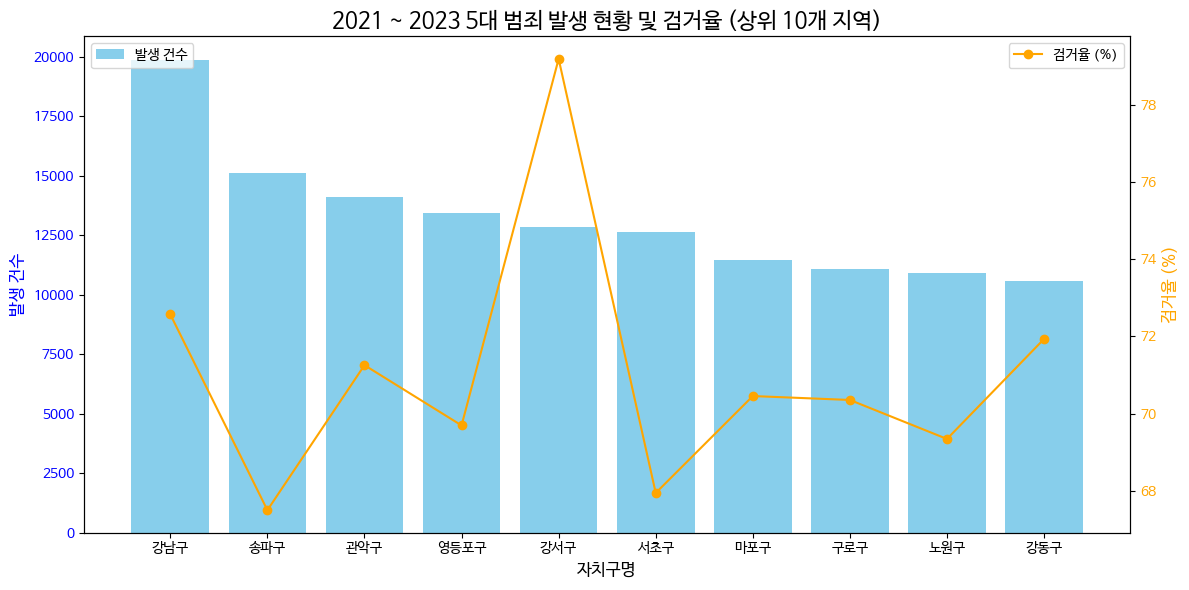

In [14]:
# 자치구별 5대 범죄 발생 현황 파악 / 검거율 파악

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 불러오기
df21 = pd.read_excel('2021 자치구별 범죄 발생 현황.xlsx')
df22 = pd.read_excel('2022 자치구별 범죄 발생 현황.xlsx')
df23 = pd.read_excel('2023 자치구별 범죄 발생 현황.xlsx')

df21 = df21[['자치구별(2)', '발생', '검거']]
df22 = df22[['자치구별(2)', '발생', '검거']]
df23 = df23[['자치구별(2)', '발생', '검거']]

# 데이터 병합
df_combined = pd.concat([df21, df22, df23])

# 발생 건수 합산 (자치구별 기준)
df_grouped = df_combined.groupby('자치구별(2)')[['발생', '검거']].sum().reset_index()

# 검거율 계산
df_grouped['검거율'] = (df_grouped['검거'] / df_grouped['발생']) * 100

# 발생 건수 기준으로 정렬
df_sorted = df_grouped.sort_values(by='발생', ascending=False)

# '소계' 행 제거
df_sorted = df_sorted[df_sorted['자치구별(2)'] != '소계']

# 결과를 새 엑셀 파일로 저장
df_sorted.to_excel('2021 ~ 2023 서울 5대 범죄 발생 현황 파악 결과.xlsx', index=False)

# 상위 10개 지역 추출
df_top10 = df_sorted.head(10)

plt.rc('font', family='NanumBarunGothic')

# 이중 축 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 Y축: 발생 건수 (막대 그래프)
ax1.bar(df_top10['자치구별(2)'], df_top10['발생'], color='skyblue', label='발생 건수')
ax1.set_ylabel('발생 건수', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('자치구명', fontsize=12)
ax1.legend(loc='upper left')

# 두 번째 Y축: 검거율 (선 그래프)
ax2 = ax1.twinx()
ax2.plot(df_top10['자치구별(2)'], df_top10['검거율'], color='orange', marker='o', label='검거율 (%)')
ax2.set_ylabel('검거율 (%)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

# 그래프 제목 및 레이아웃 설정
plt.title('2021 ~ 2023 5대 범죄 발생 현황 및 검거율 (상위 10개 지역)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# 그래프 출력
plt.show()

In [25]:
# 범죄별 주 발생 장소 파악

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 불러오기
df21 = pd.read_excel('2021 서울 5대 범죄 발생장소.xlsx')
df22 = pd.read_excel('2022 서울 5대 범죄 발생장소.xlsx')
df23 = pd.read_excel('2023 서울 5대 범죄 발생장소.xlsx')

# 데이터 병합
df_combined = pd.concat([df21, df22, df23])

# 범죄 유형과 발생 장소별 발생 건수 합계 계산
crime_location_stats = (
    df_combined.groupby(['범죄별', '아파트, 연립다세대', '단독주택', '노상', '상점/창고', '공중위생업소(숙박업소, 목욕탕 등)',
                         '음식점·유흥업소', '사무실', '역, 대합실', '교통수단', '문화/체육/오락시설', '학교/도서관/학원', '금융보험기관', '기타'])
    .sum()
    .reset_index()
    .sort_values(by='소계', ascending=False)
)

# 범죄 유형별 주요 발생 장소 5개씩 추출
top_locations_by_crime = (
    crime_location_stats.groupby('범죄별', group_keys=False)
    .apply(lambda x: x.nlargest(5, '소계'))  # '소계' 기준 상위 5개 추출
    .reset_index(drop=True)
)

# 결과를 새로운 엑셀 파일로 저장
output_file = '서울 5대 범죄별 주 발생 장소 분석 결과.xlsx'
top_locations_by_crime.to_excel(output_file, index=False)

# 한글 폰트 설정 (NanumBarunGothic 기준)
plt.rc('font', family='NanumBarunGothic')

# 각 범죄 유형에 대해 시각화
for crime in top_locations_by_crime['범죄별'].unique():
    crime_data = top_locations_by_crime[top_locations_by_crime['범죄명'] == crime]

    plt.figure(figsize=(10, 6))
    plt.bar(crime_data['범죄별'], crime_data['소계'], color='skyblue')
    plt.title(f'{crime} - 주요 발생 장소 (Top 5)', fontsize=16)
    plt.xlabel('발생 장소', fontsize=12)
    plt.ylabel('발생 건수', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

<ipython-input-25-b71554aa8315>:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, '소계'))  # '소계' 기준 상위 5개 추출
